In [4]:
## 코렙 드라이브 마운트합니다.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd /content/drive/MyDrive/data/img

/content/drive/MyDrive/data/img


# 전이학습
- 전이 학습(Transfer Learning)은 특정 분야에서 학습된 신경망의 일부 능력을 유사하거나 전혀 새로운 분야에서 사용되는 신경망의 학습에 이용하는 것을 의미하며,
- 전이 학습은 학습 데이터의 수가 적을때도 효과적이며, 학습 속도도 빠릅니다.

## 이미지넷 프로젝트에서 제공하는 모델 사용해보기

In [48]:
from tensorflow.keras.preprocessing.image import load_img # 텐서 명렁어 활용
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.applications.vgg16 import VGG16

# 사전 학습된 모델 불러오기
# input_tensor = Input(shape=(150,150,3))


# include_top : 신경망 FC 층 존재 유무 ( False : 제거 / True : 유지 )
# weights : 가중치 모델 지정 ( None : 초기화된 가중치, 'imagenet' : 사전 학습된 가중치 )
# input_tensor : 입력 텐서 크기 ( Input(shape = (w, h, ch))

#model = VGG16(weights='imagenet', include_top=False, input_tensor = input_tensor)  

model = VGG16()



In [49]:
import numpy as np

#fileName=input image 
fileName='ele.jpg' # 내 드라이브에서 이미지 불러오기

image = load_img(fileName, target_size=(224, 224))
image = img_to_array(image)
print(np.shape(image))
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])


(224, 224, 3)


In [60]:
image = preprocess_input(image) # vgg16 제공 자료로 전처리를 알아서 진행함(ex/ 스케일링, 흑백 등)

yhat = model.predict(image)  #yhat 카테고리가 1000개임
print(np.shape(yhat))
print(len(yhat[0]))

(1, 1000)
1000


In [61]:
label = decode_predictions(yhat) # class_names 로 변경
label
# 상위 5개 출력 [코드넘버, class_name, 일치율(1중에서 얼마나 가중치가 있는가)]

[[('n01871265', 'tusker', 0.8649647),
  ('n02437312', 'Arabian_camel', 0.124226965),
  ('n02504458', 'African_elephant', 0.0039087418),
  ('n02504013', 'Indian_elephant', 0.002100776),
  ('n03759954', 'microphone', 0.0018646275)]]

In [53]:
label = label[0][0] # 상위 5개중 가장 높은 일치율
print('%s (%.2f%%)'%(label[1], label[2]*100)) # [class_name, 일치율] 출력

tusker (84.11%)


In [47]:
import matplotlib.pyplot as plt
from PIL import Image
### for를 넣어서 자료를 여러개 인지
#fileName=input image 
tmp = ['car.jpg', 'ele.jpg']
for fileName in tmp:
  image = load_img(fileName, target_size=(224, 224))
  image = img_to_array(image)
  image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
  image = preprocess_input(image)
  yhat = model.predict(image)  #yhat 
  label = decode_predictions(yhat)
  label = label[0][0] # 상위 5개중 가장 높은 일치율
  print('%s (%.2f%%)'%(label[1], label[2]*100)) # [class_name, 일치율] 출력


sports_car (60.85%)
Arabian_camel (67.74%)


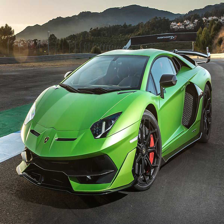

In [37]:
import matplotlib.pyplot as plt
from PIL import Image
car_img=Image.open('car.jpg')
car_img.resize((224,224))

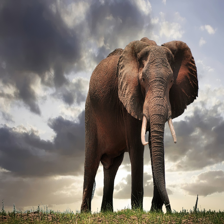

In [38]:
ele_img=Image.open('ele.jpg')
ele_img.resize((224,224))